# 1.Import the Libraries

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy.stats import ttest_1samp,ttest_ind,mannwhitneyu,levene,shapiro,wilcoxon
from statsmodels.stats.power import ttest_power
import math

# 2.Load the dataset

In [2]:
#Load the dataset

mydata=pd.read_excel('SM4-Golf.xls',sheet_name='Data')

# 3.Descriptive Statistics

In [3]:
# To show the top 5 rows of dataset

mydata.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [4]:
# To get the basic statistical summary of data

mydata.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


* It shows that mean and median of the two columns 'Current' and 'New' are very close.

* The standard deviations also have no significant change. Hence, data is normally distributed.

* There is dip in the performance of Current and New balls driving force as mean, median, min values differ.

In [5]:
## To show the detailed summary 

mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 768.0 bytes


* There are 40 values in the dataset. There are 2 columns Current and New .

* Both have non-null values.There is no missing values in the dataset.

* Both variables are integer types.The memory usage is 720 bytes.

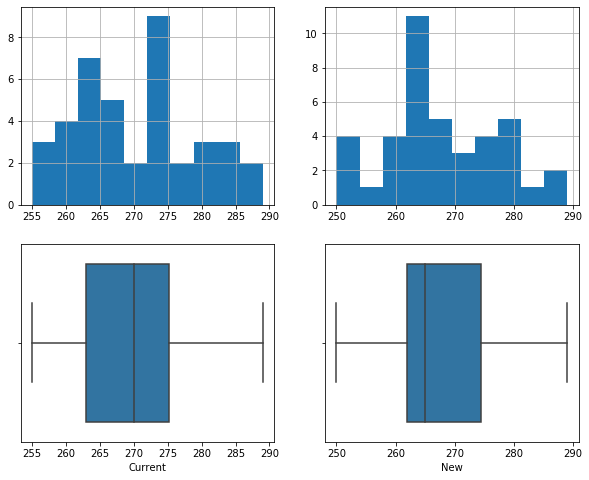

In [6]:
fig, ax2 = plt.subplots(2,2, figsize=(10, 8))
mydata['Current'].hist(ax=ax2[0][0])
mydata['New'].hist(ax=ax2[0][1])
sns.boxplot(mydata['Current'],ax=ax2[1][0])
sns.boxplot(mydata['New'],ax=ax2[1][1])


* The histogram of both vaiable 'Current' and 'New' are nearly normally distributed.

* 'Current' is little bit left skewed.

* 'New' is right skewed.

* Boxplot of both variables show that there are no outliers.

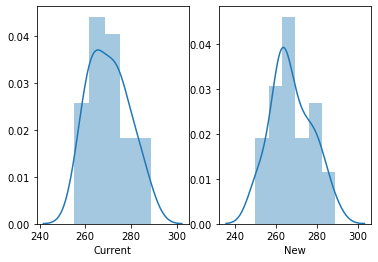

In [7]:
fig, ax2 = plt.subplots(1, 2)
sns.distplot(mydata['Current'],ax=ax2[0])
sns.distplot(mydata['New'],ax=ax2[1])

# 4.Hypothesis Testing

* The sample size is n=40. As the sample size is greater than 30 we will go for Z test. But the population standard deviation (Sigma) is unknown, Therefore, we have to use T test.

* Assume the significance level (Alpha)=0.05.

* To compare the driving distances of of the Current and New golf balls, we use Two tailed t test.

### Formulation of Hypothesis

Here we use two tailed independent t test

* **Null Hypothesis** 

$
H_{0}:{\mu_{1}}-{\mu_{2}}=0
$
It means there is no significant change in the driving distances of the current and new golf balls.

* **Alternate Hypothesis** 

$
H_{a}:{\mu_{1}}-{\mu_{2}} {\not=} 0
$
It means there is a significant change in the driving distances of the current and new golf balls.

### Levene Test

In [8]:
levene(mydata['Current'],mydata['New'])

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

p_value indicate null hypothesis should not be rejected.The null hypothesis of levene test is that the variances are equal.  

### Shapiro Test

In [9]:
shapiro(mydata['Current'])

(0.9707046747207642, 0.378787100315094)

In [10]:
shapiro(mydata['New'])

(0.9678263664245605, 0.3064655363559723)

The p value greater than 0.5 hence,the normality assumptions for each variable are fulfilled successfully.

### Two tailed Two sample independent t-test

In [11]:
t_statistics,p_value=ttest_ind(mydata['Current'],mydata['New'])
print('t-statistics=',t_statistics,'p_value=',p_value)

t-statistics= 1.3283615935245678 p_value= 0.18793228491854663


* Here the p_value is 0.1879 which is greater than the 0.05.Therefore, we failed to reject the Null Hypothesis.

* It means there is no significant change in the driving distances of the current and new golf balls.

* Hence, the new balls might not be preffered by the management rather than the old ones.

In [12]:
print('Current mean=',mydata['Current'].mean())
print('New mean=',mydata['New'].mean())

Current mean= 270.275
New mean= 267.5


**One Sample t-test for Current**

In [13]:
t_statistics,p_value=ttest_1samp(mydata['Current'],0)
print('The t-statistic is %.3f'% t_statistics)
print('The p_value is', p_value)

The t-statistic is 195.290
The p_value is 6.087391701390452e-60


In [14]:
tstat=-2.022
mu=mydata['Current'].mean()
s=mydata['Current'].std()
n=mydata['Current'].count()
xbar1=tstat*(s/np.sqrt(n))+mu
tstat=2.022
mu=mydata['Current'].mean()
s=mydata['Current'].std()
n=mydata['Current'].count()
xbar2=tstat*(s/np.sqrt(n))+mu

print("The 95% confidence interval for Current balls driving distance mean is " ,xbar1, " to ", xbar2, sep="")


The 95% confidence interval for Current balls driving distance mean is 267.47661585316285 to 273.0733841468371


**One Sample t-test for New**

In [15]:
tstat=-2.022
mu=mydata['New'].mean()
s=mydata['New'].std()
n=mydata['New'].count()
xbar1=tstat*(s/np.sqrt(n))+mu
tstat=2.022
mu=mydata['New'].mean()
s=mydata['New'].std()
n=mydata['New'].count()
xbar2=tstat*(s/np.sqrt(n))+mu
print("The 95% confidence interval for NEw balls driving distance mean is " ,xbar1, " to ", xbar2, sep="")


The 95% confidence interval for NEw balls driving distance mean is 264.3358975753231 to 270.6641024246769


In [16]:
t_statistics,p_value=ttest_1samp(mydata['New'],0)
print(t_statistics,p_value)

170.9442133673136 1.0890371893600406e-57


In [17]:
t_statistics,p_value=ttest_1samp(mydata['New']-mydata['Current'],0)

In [18]:
print(t_statistics,p_value)

-1.2769699827911767 0.20916361823147053


# 5.Pooled Standard Deviation

In [19]:
# Std Deviation of Current golf and New golf sample size

std_current = np.std(mydata['Current'])
std_new = np.std(mydata['New'])

In [20]:
# Calculating Pooled Standard Deviation
pooled_std = math.sqrt(((std_current*std_current)+(std_new*std_new))/(2))
print ("The Pooled Standard Deviation is: %.3f" %pooled_std)

The Pooled Standard Deviation is: 9.225


# 6. Power of the Test

In [21]:
# Creating a function
def sample_power_difftest(d,s,power=0.8,sig=0.05):
    z = scipy.stats.norm.isf([sig/2])
    zp = -1 * scipy.stats.norm.isf([power])
    n = (2*(s**2)) * ((zp+z)**2) / (d**2)
    return int(round(n[0]))

In [22]:
# Mean of Current golf and New golf sample size
mean_current=np.mean(mydata['Current'])
mean_new=np.mean(mydata['New'])

In [23]:
d = mean_current - mean_new
print(d)

2.7749999999999773


In [24]:
n=sample_power_difftest(d,pooled_std,power=0.8,sig=0.5)
print("total Number of Observations: ", n)

total Number of Observations:  51


* It gives the ideal sample size of the two data variables.
* We can find the optimal number of observations required for a dataset.
* We require the number of oberservations 51 to get a power of 80%. The number of observation we have is 40 which is not sufficient to obtain the power of 80%.

# 7.Conclusion

* The new golf ball will not be introduced to the market.

* There is no significance difference in driving distance of the Current and New golf balls.

* It is better to conduct test with larger sample size to improve the accuracy of the test results.

* It is also good to interpret other characteristics of the golf balls like size, shape etc.